In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import scipy.stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from kneed import KneeLocator

def decrire_table(val):
    """
    Applies dtypes, describe(), isnull().sum() and .duplicated()sum() methods to the data frame
    """
    print("-"*20)
    print(val.dtypes)
    print("-"*20)
    print(val.describe())
    print("-"*20)
    print("Number of NAN:\n",val.isnull().sum())
    print("-"*20)
    print("Number of duplicates: ", val.duplicated(keep=False).sum())

In [3]:
dispo_alimeantaire = pd.read_csv("C:/Users/ocon_/Sync/1_Data_analyst/P9_ocon_jorge/DAN-P9-data/DisponibiliteAlimentaire_2017.csv")
population_2000_2018 = pd.read_csv("C:/Users/ocon_/Sync/1_Data_analyst/P9_ocon_jorge/DAN-P9-data/Population_2000_2018.csv")
PIB_2017 = pd.read_csv("C:/Users/ocon_/Sync/1_Data_analyst/P9_ocon_jorge/DAN-P9-data/PIB_2017.csv")


dispo_alimeantaire_copy = dispo_alimeantaire.copy()
population_2000_2018_copy = population_2000_2018.copy()
PIB_2017_copy = PIB_2017.copy()

 ### Nettoyage des données

In [4]:
decrire_table(dispo_alimeantaire)

--------------------
Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object
--------------------
           Code zone   Code Élément   Code Produit  Code année     Année  \
count  176600.000000  176600.000000  176600.000000    176600.0  176600.0   
mean      125.474740    3810.052894    2628.778545      2017.0    2017.0   
std        72.941699    2211.790089      91.993247         0.0       0.0   
min         1.000000     645.000000    2511.000000      2017.0    2017.0   
25%        63.000000     684.000000    2556.000000      2017.0    2017.0   
50%       12

In [5]:
decrire_table(population_2000_2018)

--------------------
Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object
--------------------
         Code zone  Code Élément  Code Produit   Code année        Année  \
count  4411.000000        4411.0        4411.0  4411.000000  4411.000000   
mean    132.202902         511.0        3010.0  2009.068238  2009.068238   
std      75.854840           0.0           0.0     5.481539     5.481539   
min       1.000000         511.0        3010.0  2000.000000  2000.000000   
25%      68.000000         511.0        3010.0  2004.0

In [6]:
decrire_table(PIB_2017)

--------------------
Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object
--------------------
       Code zone (M49)  Code Élément  Code Produit  Code année   Année  \
count       422.000000    422.000000         422.0       422.0   422.0   
mean        429.407583   6114.500000       22008.0      2017.0  2017.0   
std         250.939413      4.505341           0.0         0.0     0.0   
min           4.000000   6110.000000       22008.0      2017.0  2017.0   
25%         209.000000   6110.000000       22008.0      2017.0  

 ### Reshaping

#### Reshaping: population_2000_2018

In [7]:
population_2000_2018.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


In [8]:
population_2000_2018 = population_2000_2018.set_index(["Zone", "Année"], drop=True).unstack()["Valeur"].reset_index()
population_2000_2018.head(3)

Année,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921
1,Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518
2,Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740


In [9]:
population_2017 = population_2000_2018[['Zone', 2017]]
population_2017 = population_2017.rename(columns={2017:"2017 (en milliers)"})

#### Reshaping: dispo_alimeantaire

In [10]:
dispo_alimeantaire.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


In [11]:
dispo_alimeantaire_2017 = dispo_alimeantaire[(dispo_alimeantaire.Produit.isin(["Viande de Volailles"]))]
dispo_alimeantaire_2017 = dispo_alimeantaire_2017.set_index(["Zone", "Élément","Produit"], drop=True).unstack()["Valeur"].reset_index()
dispo_alimeantaire_2017 = dispo_alimeantaire_2017.set_index(["Zone", "Élément"], drop=True).unstack()["Viande de Volailles"].reset_index()

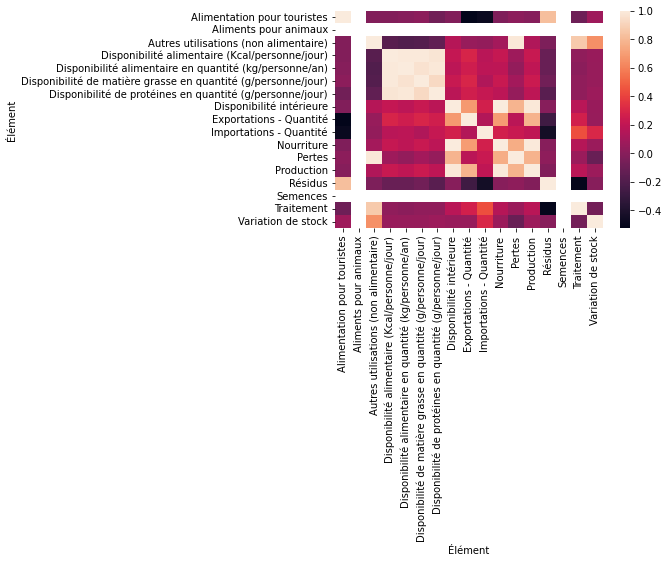

In [12]:
corr_matrix = dispo_alimeantaire_2017.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

In [13]:
dispo_alimeantaire_2017 = dispo_alimeantaire_2017.drop(columns=['Aliments pour animaux', 'Autres utilisations (non alimentaire)', 'Alimentation pour touristes', 
                                                                'Semences', 'Traitement', 'Variation de stock', 'Disponibilité alimentaire (Kcal/personne/jour)', 
                                                                'Nourriture', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 
                                                               'Disponibilité de protéines en quantité (g/personne/jour)', 'Pertes', 'Résidus']).fillna(0)


dispo_alimeantaire_2017.head(3)

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,1.53,57.0,0.0,29.0,28.0
1,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0
2,Albanie,16.36,47.0,0.0,38.0,13.0


#### Reshaping: PIB_2017

In [14]:
PIB_2017.head(3)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,18896.352021,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,520.616409,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,349006.689642,X,Ciffre de sources internationales,NaN


In [15]:
PIB_2017 = PIB_2017.set_index(["Zone", "Élément","Produit"], drop=True).unstack()["Valeur"].reset_index()
PIB_2017 = PIB_2017.set_index(["Zone", "Élément"], drop=True).unstack()["Produit Intérieur Brut"].reset_index()

PIB_2017.head(3)

Élément,Zone,Valeur US $,Valeur US $ par habitant
0,Afghanistan,18896.352021,520.616409
1,Afrique du Sud,349006.689642,6121.876572
2,Albanie,13019.729856,4514.204908


### Merge de population, PIB et disponibilité alimentaire

In [16]:
population_dispo_alimenatire = dispo_alimeantaire_2017.merge(population_2017, left_on='Zone', right_on='Zone')
population_PIB_dispo_alimenatire = population_dispo_alimenatire.merge(PIB_2017, left_on='Zone', right_on='Zone')
population_PIB_dispo_alimenatire = population_PIB_dispo_alimenatire.set_index('Zone')
population_PIB_dispo_alimenatire.head(3)

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,2017 (en milliers),Valeur US $,Valeur US $ par habitant
Zone,,,,,,,,
Afghanistan,1.53,57.0,0.0,29.0,28.0,36296.113,18896.352021,520.616409
Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,57009.756,349006.689642,6121.876572
Albanie,16.36,47.0,0.0,38.0,13.0,2884.169,13019.729856,4514.204908


In [17]:
population_PIB_dispo_alimenatire_copy = population_PIB_dispo_alimenatire.copy()